In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import correlate

# Instructions for this exercise

You have been given data from an experiment, in which someone has measured 10 amplifiers, which are designed to be identical. A simple figure of all ten amplification curves is shown below. 

It shows the amplification as function of frequency. So at 200 MHz, an amplifier typically amplifies the signal with a factor of 800. 

In [2]:
all_files = os.listdir('Data')
print(len(all_files))

10


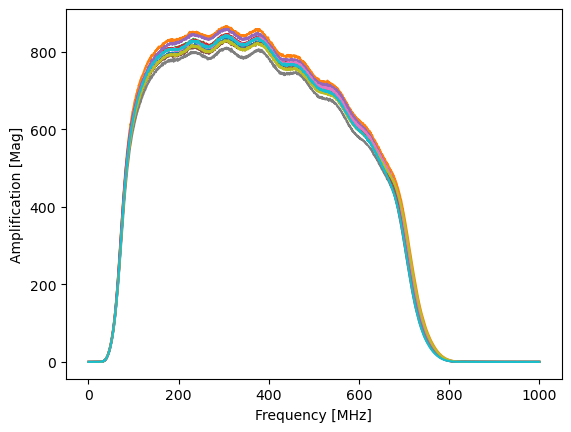

In [3]:
plt.figure()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
for one_file in all_files:
    data = np.loadtxt(os.path.join('Data', one_file),skiprows=7,delimiter=',')
    plt.plot(data[:,0]/1e6,data[:,5])

The task is to make a figure that shows best how different or how similar all of those amplifiers are. You can use single plots, plots with multiple panels, color, linestyle, whatever you like. The task is to provide the reader, at first view, with an estimate how uniform (or non-uniform) the production of the amplifiers was. 

You can also choose to manipulate the data, by for example calculating the mean or other statsitical quantities. Whatever seems to make the most sense to you. 
If you have a different idea, but cannot implement it in programming, you can also describe what you would have done in your presentation. 


# Submission

In [4]:
data = []
names = ['Freq(Hz)','S11(MAG)','S11(DEG)','S12(MAG)','S12(DEG)','S21(MAG)','S21(DEG)','S22(MAG)','S22(DEG)']

# Read all files into a list of pandas dataframes

for one_file in all_files:
    dataframe = pd.read_csv(os.path.join('Data', one_file),skiprows=7,delimiter=',', names=names,)
    dataframe['Gain'] = 20*np.log10(dataframe['S21(MAG)'])
    data.append(dataframe.copy())
    # Add a column to each dataframe with the gain in dB, which is 20*log10(magnitude)
    

data[0].head().astype(float) 

,Freq(Hz),S11(MAG),S11(DEG),S12(MAG),S12(DEG),S21(MAG),S21(DEG),S22(MAG),S22(DEG),Gain
0,9000.0,0.997561,0.594921,0.000918,59.715607,0.006558,-117.314280,1.004974,0.955113,-43.664326
1,508995.5,0.997571,-5.731422,0.006719,-90.969879,0.030959,55.186451,1.029840,-7.229319,-30.184247
2,1008991.0,0.996732,-11.139008,0.003955,133.906660,0.020028,-178.901660,0.975459,-16.174904,-33.967435
3,1508986.5,0.996764,-16.656860,0.000556,-173.510060,0.041897,-4.809897,0.975524,-24.364841,-27.556334
4,2008982.0,0.993870,-21.955305,0.001749,167.106950,0.022320,-100.913190,1.003295,-32.742680,-33.026288


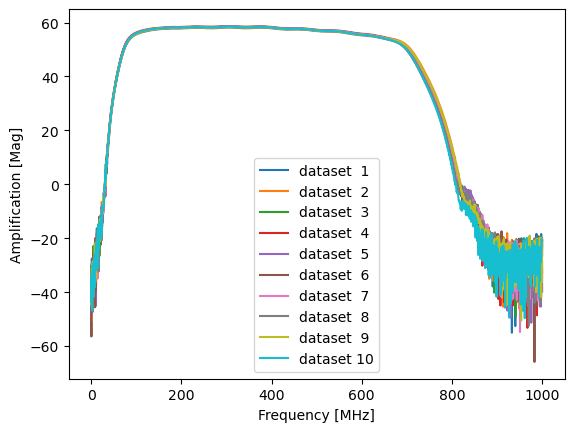

In [5]:
plt.figure()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')

# Plot the gain for each dataset

for i, dataframe in enumerate(data):
    plt.plot(dataframe['Freq(Hz)']/1e6,dataframe['Gain'], label=f"dataset {i+1:2d}")
    
    
plt.legend()


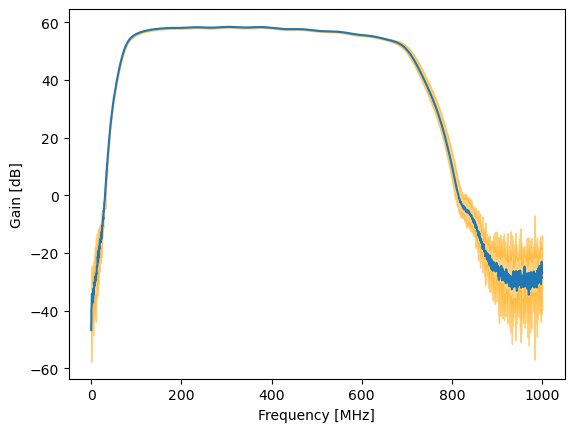

In [6]:
# Plot the mean gain and the standard deviation at each frequency

mean_gain = np.mean([dataframe['Gain'] for dataframe in data], axis=0)
std_gain = np.std([dataframe['Gain'] for dataframe in data], axis=0)

freqMHz = data[0]['Freq(Hz)']/1e6 # define the frequency axis for easy plotting

plt.figure()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Gain [dB]')
plt.plot(freqMHz,mean_gain, label='mean')

# plot twice exagerated error bars as a shaded region
plt.fill_between(freqMHz, mean_gain-2*std_gain, mean_gain+2*std_gain, alpha=0.5, label='std', color='orange')



## Plot 1: The Mean amplifer gain and its standard deviation as function of frequency



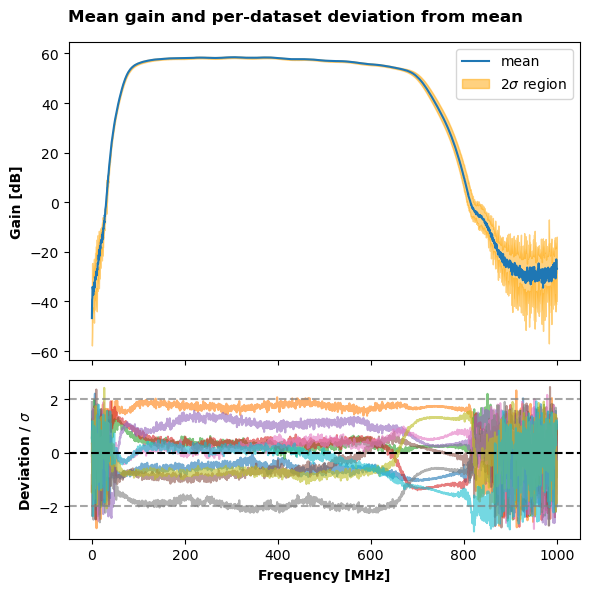

In [29]:
mean_gain = np.mean([dataframe['Gain'] for dataframe in data], axis=0)
std_gain = np.std([dataframe['Gain'] for dataframe in data], axis=0)

freqMHz = dataframe['Freq(Hz)']/1e6

figure, axes = plt.subplots(2,1, figsize=(6,6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
#set height ratios for sublots


#axes[0].set_xlabel('Frequency [MHz]')
axes[0].set_ylabel('Gain [dB]', weight='bold')

axes[0].plot(freqMHz,mean_gain, label='mean')
axes[0].fill_between(freqMHz, mean_gain-2*std_gain, mean_gain+2*std_gain, alpha=0.5, label=r'$2\sigma$ region', color='orange')
axes[0].legend()


axes[1].set_xlabel('Frequency [MHz]', weight='bold')
axes[1].set_ylabel(r'Deviation / $\sigma$', weight='bold')

# Plot the deviation from the mean gain in units of the gain standard deviation, for each dataset at each frequency
for i, dataframe in enumerate(data):
    deviation_over_std = (dataframe['Gain']-mean_gain)/std_gain
    axes[1].plot(freqMHz, deviation_over_std, alpha=0.6)
    
axes[1].axhline(0, color='black', ls='--')
axes[1].axhline(2, color='grey', ls='--', alpha=0.7)
axes[1].axhline(-2, color='grey', ls='--', alpha=0.7)
    
    
figure.suptitle('Mean gain and per-dataset deviation from mean', weight='bold')
plt.tight_layout()

plt.savefig('mean_and_deviation.pdf')

(-10.0, 10.0)

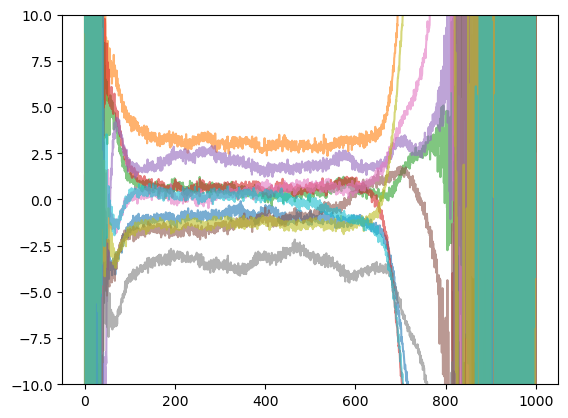

In [36]:
mean_S21 = np.mean([dataframe['S21(MAG)'] for dataframe in data], axis=0)
std_S21 = np.std([dataframe['S21(MAG)'] for dataframe in data], axis=0)

for i, dataframe in enumerate(data):
    deviation_over_std = (dataframe['S21(MAG)']-mean_S21)/std_S21
    deviation_over_mean = (dataframe['S21(MAG)']-mean_S21)/mean_S21*100
    plt.plot(freqMHz, deviation_over_mean, alpha=0.6)

plt.ylim(-10,10)

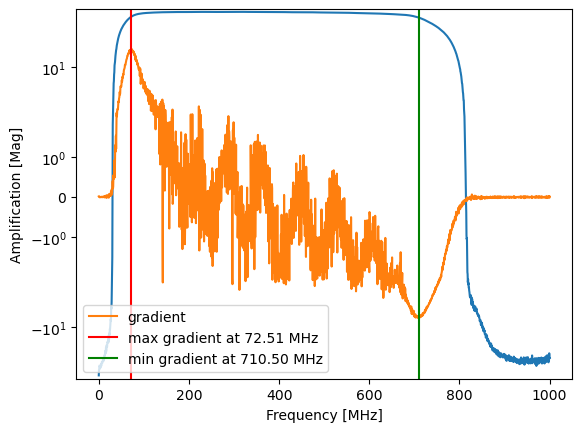

In [9]:
mean = np.mean([dataframe['S21(MAG)'] for dataframe in data], axis=0) # mean of the magnitude of S21

plt.figure()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
plt.plot(freqMHz,mean_gain)


amp_gradient = np.gradient(mean, freqMHz) # calculate the gradient of the mean gain

freq_at_max_gradient = freqMHz[np.argmax(amp_gradient)] # find the frequency at which the gradient extrema
freq_at_min_gradient = freqMHz[np.argmin(amp_gradient)]

plt.plot(freqMHz,amp_gradient, label='gradient')

plt.axvline(freq_at_max_gradient, color='r', label=f"max gradient at {freq_at_max_gradient:.2f} MHz")
plt.axvline(freq_at_min_gradient, color='g', label=f"min gradient at {freq_at_min_gradient:.2f} MHz")
plt.yscale('symlog')
plt.legend()

mask = (freqMHz > 80) & (freqMHz < 700) # define a mask to select the frequency range where the change in gain w.r.t frequency is relatively flat

## Plot 2: 
- Zooming in on constant gain region and investigating the spread, and 
- invesitigating the derviative of the gain with respect to frequency

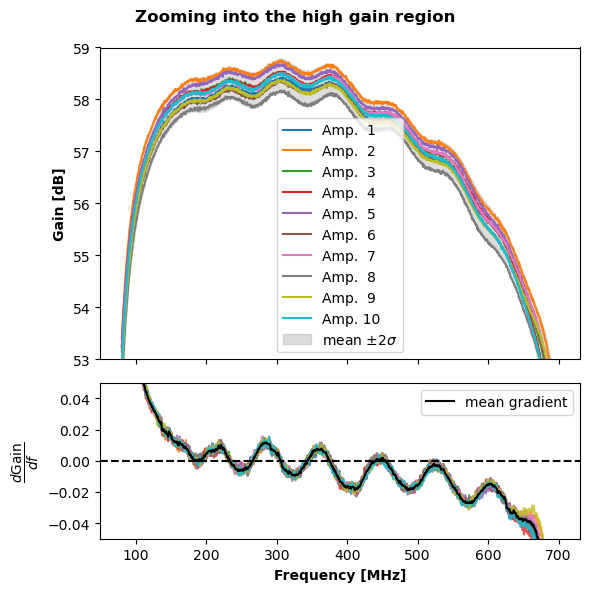

In [10]:
figure, axes = plt.subplots(2,1, figsize=(6,6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

#axes[0].set_xlabel('Frequency [MHz]')
axes[0].set_ylabel('Gain [dB]', weight='bold')

for i, dataframe in enumerate(data):
    axes[0].plot(freqMHz[mask],dataframe['Gain'][mask], label=f"Amp. {i+1:2d}")

axes[0].fill_between(freqMHz[mask], mean_gain[mask]-2*std_gain[mask], mean_gain[mask]+2*std_gain[mask], alpha=0.4, label=r'mean $\pm 2\sigma$', color='darkgrey')

axes[0].legend()
axes[0].set_ylim(53, 59)

# define a function to apply a Savitzky-Golay filter to smooth an array,
# useful to smooth the gradient and make it easier to see its behaviour
savgol_smooth = lambda x, window: savgol_filter(x, window, 1) 

window = 20 # define the window size for the smoothing
mean_gradient = np.gradient(mean_gain[mask], freqMHz[mask]) # calculate the gradient of the mean gain
mean_gradient = savgol_smooth(mean_gradient, window)

axes[1].set_xlabel('Frequency [MHz]', weight='bold')
axes[1].set_ylabel(r'$\frac{d\text{Gain}}{df}$', fontsize=14, weight='bold')

for i, dataframe in enumerate(data):
    gradient = np.gradient(dataframe['Gain'][mask], freqMHz[mask]) # calculate the gradient of this dataset's gain
    gradient = savgol_smooth(gradient, window)
    axes[1].plot(freqMHz[mask],gradient, alpha=0.8)

axes[1].plot(freqMHz[mask],mean_gradient, label='mean gradient', color='k') 
axes[1].set_ylim(-0.05, 0.05)
axes[1].axhline(0, color='black', ls='--')
#axes[1].set_yscale('symlog')
axes[1].legend()

figure.suptitle('Zooming into the high gain region', weight='bold')

plt.tight_layout()

plt.savefig('zoomed.pdf')

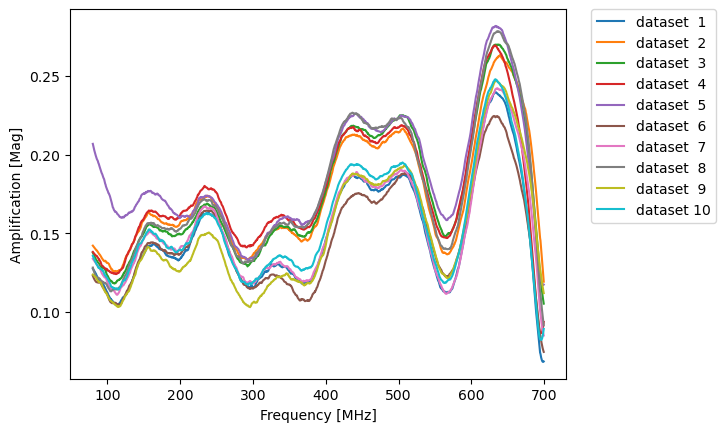

In [11]:
rolling_smooth = lambda x, window: np.convolve(x, np.ones(window)/window, mode='same') 
savgol_smooth = lambda x, window: savgol_filter(x, window, 2)

plt.figure()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplification [Mag]')
# look at the S11 parameter, which is the coefficient of reflection at the input port
for i, dataframe in enumerate(data):
    plt.plot(freqMHz[mask],savgol_smooth(dataframe['S11(MAG)'][mask], 20), label=f"dataset {i+1:2d}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.yscale('symlog')

(0.5, 8240435.663000875)

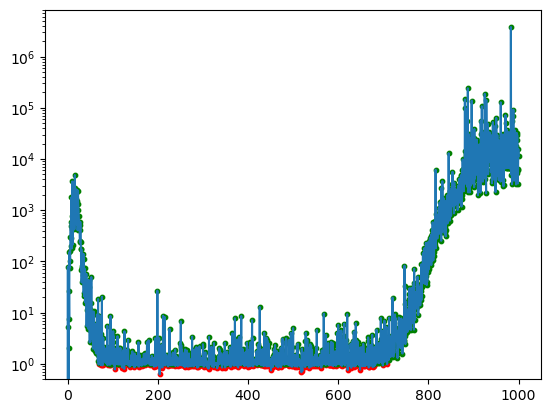

In [12]:
# trying to find the stability factor K at each frequency, I am not sure if this is correct

def stability_factor(dataframe): 
    # calculate the determinant of the S matrix for complex Sij, given by a magnitude and a phase
    # S = [[S11, S12], [S21, S22]]
    # Sij = magnitude_ij * exp(1i * phase_ij)
    # determinant = S11*S22 - S12*S21
    
    S11 = dataframe['S11(MAG)']*np.exp(1j*np.deg2rad(dataframe['S11(DEG)']))
    S12 = dataframe['S12(MAG)']*np.exp(1j*np.deg2rad(dataframe['S12(DEG)']))
    S21 = dataframe['S21(MAG)']*np.exp(1j*np.deg2rad(dataframe['S21(DEG)']))
    S22 = dataframe['S22(MAG)']*np.exp(1j*np.deg2rad(dataframe['S22(DEG)']))
    
    isclose = np.isclose(np.abs(S21),dataframe['S21(MAG)'])
    if any(~isclose):
        print('Warning: S21(MAG) is not equal to abs(S21)')
    
    
    det = S11*S22 - S12*S21
    det_squared = np.abs(det)**2
    denominator = 2*np.abs(S21*S12)
    K = (1-dataframe['S11(MAG)']**2-dataframe['S22(MAG)']**2+det_squared)/(denominator)
    
    return K


a = stability_factor(data[5])
    
plt.plot(freqMHz,a, label=f"dataset {i+1:2d}")
# mark values less than 1 in red
plt.scatter(freqMHz[a<1], a[a<1], color='r', s=10)
plt.scatter(freqMHz[a>1], a[a>1], color='g', s=10)

plt.yscale('log')
plt.ylim(0.5, None)

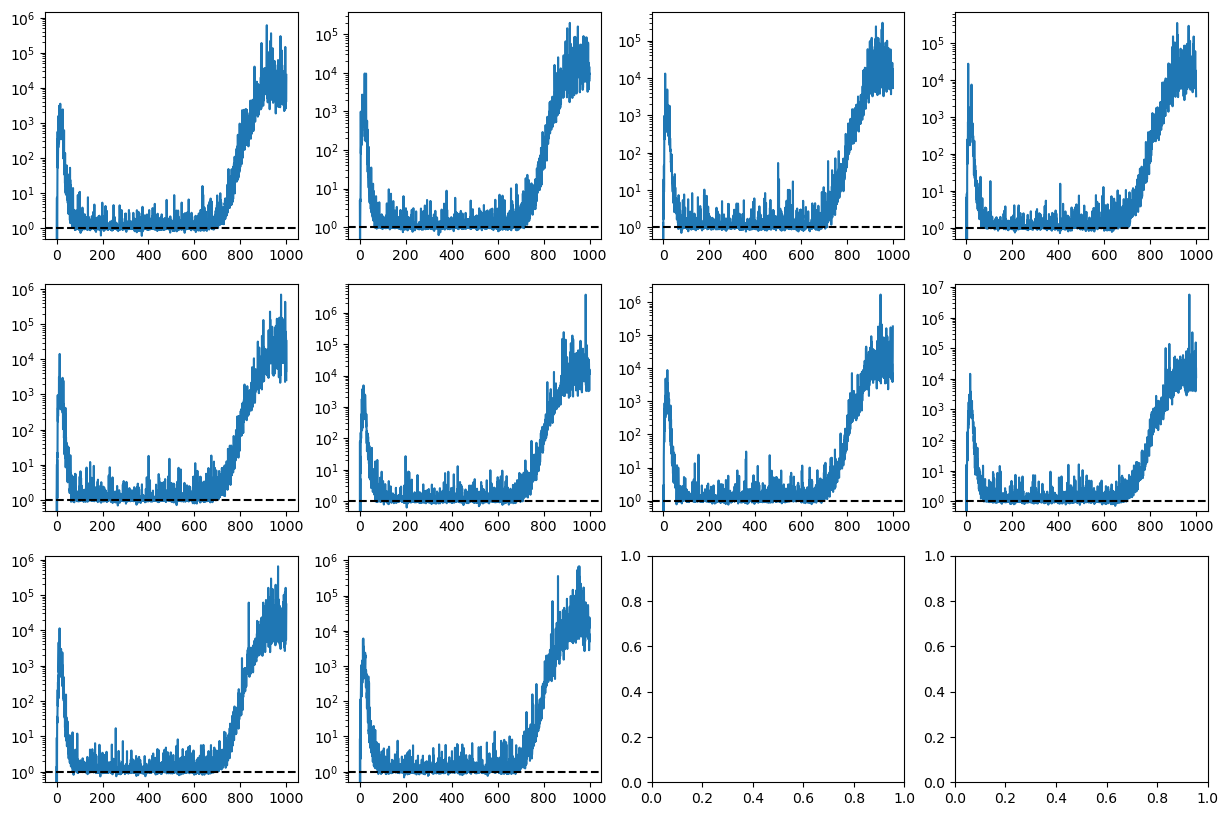

In [13]:
figure, axes = plt.subplots(3,4, figsize=(15, 10))
axes = axes.flatten()

for i, dataframe in enumerate(data):
    K = stability_factor(dataframe)
    axes[i].plot(freqMHz,K, label=f"dataset {i+1:2d}")
    axes[i].set_yscale('log')
    axes[i].set_ylim(0.5, None)
    axes[i].axhline(1, color='k', ls='--')
    